### Exercise SMOTE CustomerChurn
#### Machine Learning I - Maestría en Analítica Aplicada
#### Universidad de la Sabana
#### Prof: Hugo Franco
#### Exercise: Dealing with Class Imbalance II

- Sebastian Castellanos Estupiñan
- Ricardo Andrés Cortés Coronell
- Andrés Felipe Sanchez Rincon 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Configuración visual
sns.set(style="whitegrid")


1. Data Loading
Start by importing the libraries and loading the dataset and describe its contents

In [26]:
# Load the dataset
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(url)

Dataset Shape: (7032, 20)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  Paymen

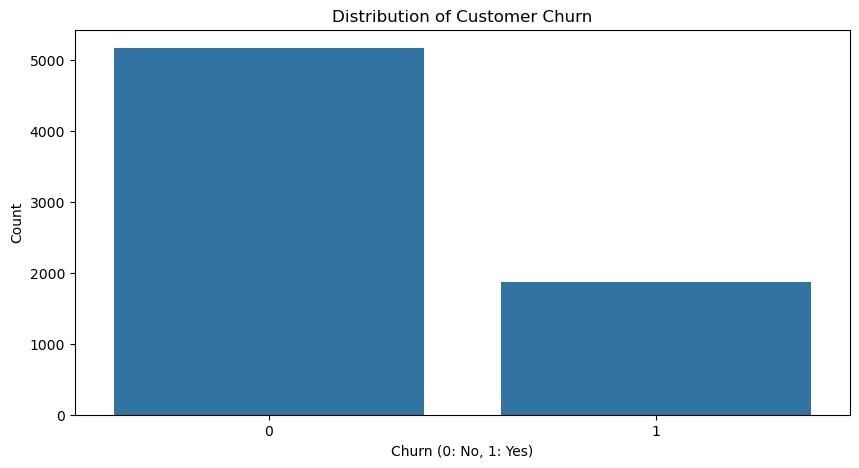


Missing Values:
Series([], dtype: int64)


In [32]:
# Definir listas de columnas
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                        'PhoneService', 'MultipleLines', 'InternetService', 
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

# Dataset Overview Analysis
print("Dataset Shape:", df.shape)

# Display general information about the dataset
print("\nDataset Info:")
print(df.info())

# Show class distribution
print("\nChurn Distribution:")
print(df['Churn'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True) * 100)

# Display summary statistics for numerical features
print("\nNumerical Features Summary:")
print(df[numerical_features].describe())

# Show unique values in categorical features
print("\nCategorical Features Overview:")
for col in categorical_features:
    print(f"\n{col} unique values:")
    print(df[col].value_counts())

# Visualize class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Churn')
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# Display missing values if any
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

2. Data Preprocessing

Necessary preprocessing steps to clean the data and prepare it for the pipeline.

In [ ]:
# 1. Separate target and features
X = df.drop('Churn', axis=1)
y = df['Churn'].map({'No': 0, 'Yes': 1})

# 2. Encode categorical variables (if any)
X = pd.get_dummies(X, drop_first=True)

# 3. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


3. Build and Train the XGBoost Pipeline
Here, we define our three-step pipeline. When we call `.fit()`, it will automatically preprocess the data, apply SMOTE to the results, and then train the XGBoost classifier on the balanced data.

##### A. Modelo Baseline (sin SMOTE)

In [35]:
baseline_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
baseline_model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


##### B. Modelo con SMOTE

In [36]:
smote_pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

smote_pipeline.fit(X_train, y_train)


,steps,"[('smote', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,'auto'
,random_state,42
,k_neighbors,5
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None


4. Evaluate the Model
Finally, we use the trained pipeline to make predictions on the untouched test set and evaluate its performance.

--- Baseline ---
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.57      0.52      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407


--- SMOTE Pipeline ---
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1033
           1       0.56      0.58      0.57       374

    accuracy                           0.77      1407
   macro avg       0.70      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



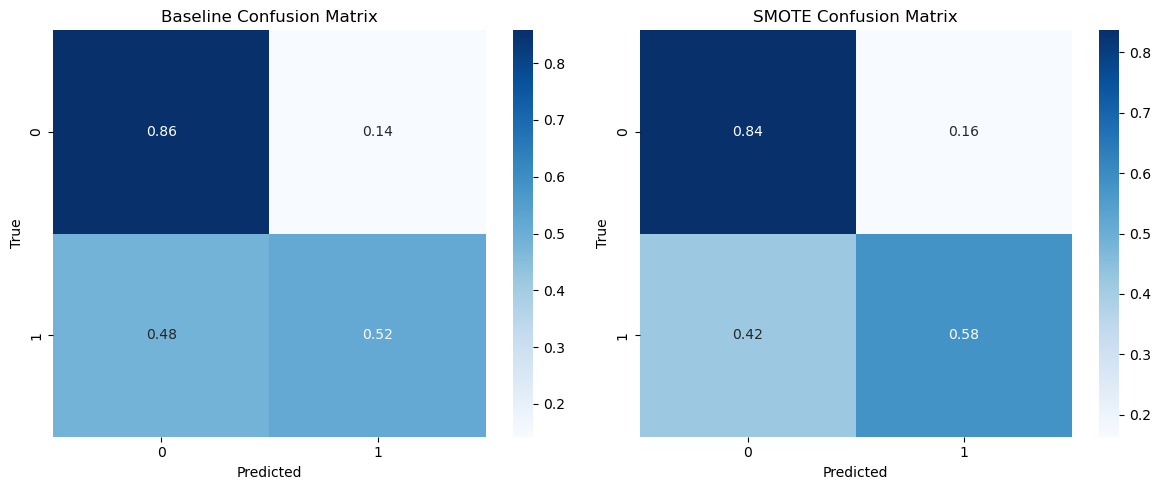

In [37]:
# Baseline predictions
y_pred_base = baseline_model.predict(X_test)
print("--- Baseline ---")
print(classification_report(y_test, y_pred_base))

# SMOTE pipeline predictions
y_pred_smote = smote_pipeline.predict(X_test)
print("\n--- SMOTE Pipeline ---")
print(classification_report(y_test, y_pred_smote))

# Confusion matrices
cm_base = confusion_matrix(y_test, y_pred_base, normalize='true')
cm_smote = confusion_matrix(y_test, y_pred_smote, normalize='true')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_base, annot=True, fmt=".2f", cmap="Blues", ax=axes[0])
axes[0].set_title("Baseline Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

sns.heatmap(cm_smote, annot=True, fmt=".2f", cmap="Blues", ax=axes[1])
axes[1].set_title("SMOTE Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout()
plt.show()